# TP3 : Autour de la méthode de Newton

## Exercice 1.- Implémentation de la méthode de Newton


On rappelle la méthode de Newton (en pseudo-code):

**Data :**  fonction et dérivée `fun` et `funprime`, initialisation `x0`, tolérance `epsilon`, nombre maximal d'itérations `maxIt`

*initialisation*  
`x` $\longleftarrow$ `x0`  
`nbIt`  $\longleftarrow$ `0`  

**While** *critère d'arrêt pas satisfait* **and** `nbIt < maxIt` **do**  
$\qquad$ mettre à jour `x`  
$\qquad$  incrémenter `nbIt` $\longleftarrow$ `nbIt + 1`   

**return** `x` and ...

1. Écrire une fonction `newton` prenant en argument une fonction `fun` et sa dérivée `funprime` une condition initiale `x0` une tolérance `epsilon` pour le critère d'arrêt et un nombre maximal `maxIt` d'itérations. On choisira d'implémenter ici le critère d'arrêt ``$|f(x_n)| < \epsilon$''. La fonction `newton` renverra
- un booléen `b` qui vaut `True` si le critère d'arrêt a été satisfait avant d'atteindre le nombre maximal d'itérations fixé et `False` sinon,
- le numéro de la dernière itération `nbIt`,
- la dernière valeur de $x_n$ ($ n = $ `nbIt`).

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def newton(fun, funprime, x0, epsilon, maxIt):
    It = 0
    if np.abs(fun(x0)) < epsilon:
        b = True
    else:
        b = False
    x=x0
    while (b == False) & (It < maxIt):
        if funprime(x)==0:
            return (x, It, b)
        x = x - fun(x)/funprime(x)
        It += 1
        if np.abs(fun(x)) < epsilon:
            b = True
    return (x, It, b)


2. Fixer `epsilon` $= 10^{-6}$ et `maxIt` $= 50$ (par exemple). Effectuer un premier test avec $f_0 (x) = x^2 - 1$ en partant de `x0 = 4`.

In [2]:
def f0(x):
    return x**2 - 1
    
def f0prime(x):
    return 2*x
    
epsilon = 10**(-6)
maxIt = 50

x0 = 4
print(newton(f0, f0prime, x0, epsilon, maxIt))

(1.0000001591732348, 5, True)


3. On veut à présent étudier l'influence de la condition initiale `x0`. Discrétiser uniformément l'intervalle $[-2, 2]$ en un vecteur `I0` à $N$ points et appliquer la méthode de Newton à $f_0$ à partir de ces $N$ conditions initiales. Représenter sur une même figure les $N$ points $(x, 0)_{x \in I0}$, en noir si la méthode n'a pas convergé, en rouge si elle a convergé vers la solution négative et en vert si elle a convergé vers la solution négative. On pourra prendre $N = 100$ puis $N=200$ par exemple.

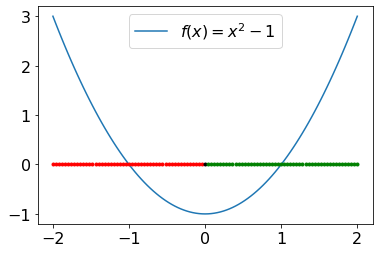

In [3]:
xx = np.linspace(-2,2,101)
plt.plot(xx, f0(xx), label=u'$f(x) = x^2 -1$')
for x0 in xx:
    sol, It, b = newton(f0, f0prime, x0, epsilon, maxIt)
    if b == False:
        plt.plot(x0, 0, '.', color='black')
    else: 
        if sol>=0:
            plt.plot(x0, 0, '.', color='green')
        else:
            plt.plot(x0, 0, '.', color='red')
#plt.plot(xx, np.zeros_like(xx)) # optional y = 0
plt.xticks([-2,-1,0,1,2], fontsize=16)
plt.yticks([-1,0,1,2,3], fontsize=16)
plt.legend(loc='best',fontsize=16)
#plt.savefig("newtonR1.pdf")

4. Recommencer l'étude précédente avec la fonction $f_1$ définie par $f_1(x) = x^4 - 2x^2 - 1$. 

(1.5537739740322944, 5, True)


([<matplotlib.axis.YTick at 0x7f2f7eac8430>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

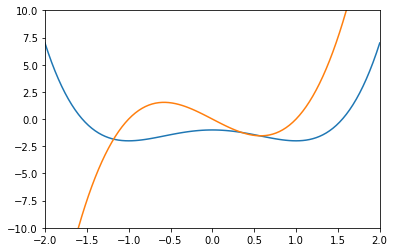

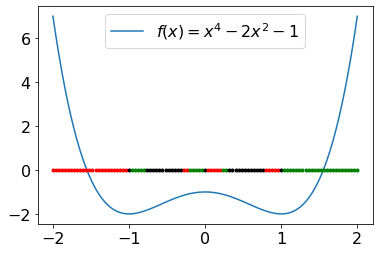

In [4]:
def f1(x):
    return x**4 - 2*x**2 -  1
    
def f1prime(x):
    return 4*x**3 - 4*x

plt.figure(1)    
plt.plot(xx, f1(xx))
plt.plot(xx, f1prime(xx))
plt.axis([-2,2,-10,10])

x0 = 2
print(newton(f1, f1prime, x0, epsilon, maxIt))

plt.figure(2)
plt.plot(xx,f1(xx), label=u'$f(x) = x^4 - 2x^2 -1$')
for x0 in xx:
    sol, It, b = newton(f1, f1prime, x0, epsilon, maxIt)
    if b == False:
        plt.plot(x0, 0, '.', color='black')
    else: 
        if sol>=0:
            plt.plot(x0, 0, '.', color='green')
        else:
            plt.plot(x0, 0, '.', color='red')
        
plt.legend(loc='best',fontsize=16)
plt.xticks([-2,-1,0,1,2], fontsize=16)
plt.yticks([-2,0,2,4,6], fontsize=16)
#plt.plot(xx, np.zeros_like(xx)) # optional y = 0
#plt.savefig("newtonR2.pdf")

*On peut définir la méthode de Newton également pour une fonction holomorphe $f$ par 
$$
z_{n+1} = z_n - \frac{f(z_n)}{f^\prime(z_n)}
$$
On aimerait étudier dans ce cadre l'influence de la condition initiale comme précédemment, dans le cas où $f(z) = z^3 - 1$. On sait que $f$ possède trois racines complexes distinctes $\mathcal{R} = \{z^1, z^2, z^3 \}$ et le but est de représenter (par exemple avec trois couleurs différentes) les trois *bassins d'attractions* associés à ces trois racines. Soit $z^\ast$ une racine de $f$, on appelle bassin d'attraction de $z^\ast$ l'ensemble des $z_0 \in \mathbb{C}$ tels que la méthode de Newton initialisée à $z_0$ converge vers $z^\ast$.*
  


## Exercice 2.- Manipulation d'images en python

1. On commence par importer le module `matplotlib.image`, puis on importe l'image `image0.png` et on l'affiche. Quel objet python est `img0` ? Recommencer avec le fichier `image1.png` puis `image2.png`.

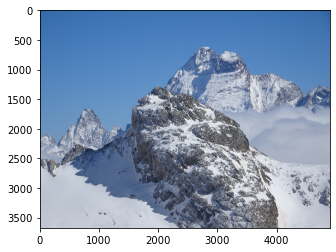

In [22]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.image as mpimg
img0 = mpimg.imread('image0.png')
plt.imshow(img0)

In [24]:
print(type(img0), img0.shape)

img1 = mpimg.imread('image1.png')
print(type(img1), img1.shape)

img2 = mpimg.imread('image2.png')
print(type(img1), img1.shape)

<class 'numpy.ndarray'> (3672, 4896, 3)
<class 'numpy.ndarray'> (477, 599, 4)
<class 'numpy.ndarray'> (477, 599, 4)


En chaque pixel est donné un vecteur de taille $3$ ou $4$, les trois premières entrées correspondent aux canaux *RGB* et le dernier à la *translucidité*, ce dernier canal est optionnel.

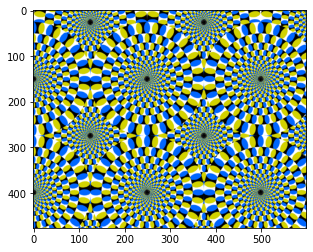

In [7]:
plt.imshow(img1)

In [8]:
img0[20,5,:]

array([0.92156863, 0.92156863, 0.92156863, 1.        ], dtype=float32)

In [9]:
img0[202,533,:]

array([0.23529412, 0.23529412, 0.23529412, 1.        ], dtype=float32)

Dans le cas d'une image en noir et blanc, les $3$ canaux prennent la même valeur qui code la nuance de gris.

In [10]:
img1[20,57,:]

array([0.99215686, 0.99215686, 0.95686275, 1.        ], dtype=float32)

In [11]:
img1[202,533,:]

array([0.8666667, 0.8666667, 0.2627451, 1.       ], dtype=float32)

2. On va coder la couleur d'un pixel par un vecteur $[R, G, B]$ de taille $3$ dit *RGB* (ou *RVB* en français rouge-vert-bleu). Chaque coordonnée varie entre $0$ et $1$ (ou $0$ et $255$ selon la convention). $[1, 0, 0]$ code le rouge, $[0, 1, 0]$ le vert, $[0, 0, 1]$ le bleu, $[1, 1, 1]$ le blanc et $[0, 0, 0]$ le noir. Créer une image de taille $N \times N$ pixels entièrement noire, puis blanche, puis rouge.


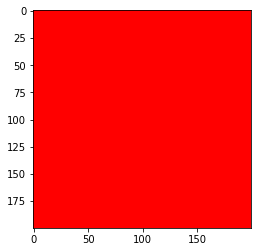

In [12]:
# creer une image toute rouge
imgR = np.zeros((200,200,3))
imgR[:,:,0] = np.ones((200, 200))

plt.imshow(imgR)

3. On représente le carré $[-1, 1] \times [-1,1]$ par une image de taille $N \times N$ représenter en rouge sur fond noir (par exemple !) le disque de rayon $0.5$ centré en $0$, puis (sur une nouvelle image) le quart de disque supérieur droit seulement.

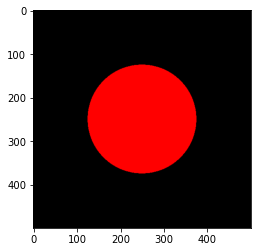

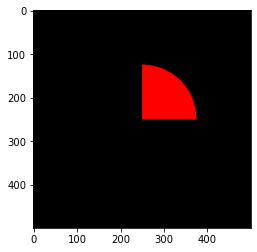

In [16]:
# initialiser une image noire de taille N par N

N = 500
image = np.zeros((N, N, 3))
plt.figure()
plt.imshow(image)
image2 = np.zeros((N, N, 3))

# initialiser la discretisation de [-1,1] * [-1,1]

px = np.linspace(-1,1,N)
py = np.linspace(1,-1,N) 
"""on renverse l'odre du vecteur car le pixel (0,0) est en haut à gauche et 
non en bas à gauche"""

for ix in range(N):
    for iy in range(N):
        z0 = complex(px[ix], py[iy])
        # on colorie en rouge les pixels tq |z| < 0.5
        if np.abs(z0) < 0.5:
            image[iy, ix, 0] = 1.
            if px[ix] >= 0 and py[iy] >=0:
                image2[iy, ix, 0] = 1.
plt.imshow(image)
plt.figure()
plt.imshow(image2)

## Exercice 3.- Fractal de Newton

*On revient à la représentation des bassins d'attraction.*

1. Définir la fonction `f` holomorphe telle que $f(z) = z^3 - 1$ ainsi que sa dérivée `fprime` et un `np.array roots` de taille $3$ contenant les trois racines distinctes de $f$.

*Afin de définir le complexe $z = x + iy$ en Python, on définit `z = complex(x, y)`.*

In [17]:
def f(z):
    return z**3 - 1

def fprime(z):
    return 3*z**2

roots = np.array([complex(-0.5, 0.5*np.sqrt(3)), complex(-0.5, -0.5*np.sqrt(3)), 1.])

2. Implémenter une méthode de Newton modifiée `newtonMod` à partir de la fonction `newton` implémentée à l'exercice $1$. On demande les modifications suivantes : on va utiliser le fait qu'on a une expression algébrique des racines de $f$ afin d'étudier plus simplement la dépendance de la méthode de Newton en la condition initiale et on remplace le critère d'arrêt de l'exercice $1$ par le critère d'arrêt "il existe une racine complexe $r$ de $f$ telle que $|x_n - r| < \epsilon$". On veut que `newtonMod` retourne les mêmes trois éléments que la fonction `newton` en changeant le booléen $b$ en un entier pouvant prendre $4$ valeurs selon que la méthode n'a pas convergé (`b=-1` par exemple) ou a convergé et dans ce cas `b` renvoie un numéro correspondant à la racine en question.

In [18]:
# Newton method
def newtonMod(fun, funprime, z0, epsilon, maxIt):
    It = 0
    b = -1
    while (b == -1) & (It < maxIt):
        z1 = z0 - fun(z0)/funprime(z0)
        z0 = z1
        It += 1
        for r in range(roots.size):
            if np.abs(z1 - roots[r]) < epsilon:
                b = r
    return (z1, It, b)

3. Discrétiser uniformément l'intervalle $[-1,1]$ avec $N$ points puis le carré $[-1,1] \times [-1,1]$ avec $N \times N$ points. Effectuer la méthode `newtonMod` à partir en prenant pour condition initiale chacun des $N^2$ points obtenus. Représenter le carré $[-1,1] \times [-1,1]$ par une image de taille $N \times N$ pixels et colorier chaque pixel en noir si la méthode n'a pas convergé et sinon en rouge, vert ou bleu selon la racine vers laquelle elle a convergé. Essayer avec $N = 50$ puis $N = 500$.

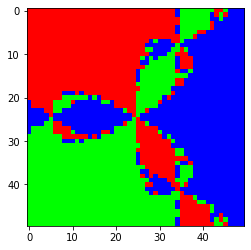

In [20]:
# initialiser la discretisation de [-1,1] * [-1,1]
N = 50
px = np.linspace(-1,1,N)
py = np.linspace(1,-1,N) 
"""on renverse l'odre du vecteur car le pixel (0,0) est en haut à gauche et non en bas à gauche"""

# bassins d'attraction des racines
image = np.zeros((N, N, 3)) # on réinitialise à une image noire

for ix in range(N):
    for iy in range(N):
        z0 = complex(px[ix], py[iy])
        sol, It, b = newtonMod(f, fprime, z0, epsilon, maxIt)      
        if b== 0:
            image[iy, ix, 0] = 1 # en rouge
        elif b == 1:
            image[iy, ix, 1] = 1 # en vert
        elif b == 2:
            image[iy, ix, 2] = 1 # en bleu
        # et si b == -1 on laisse en noir
        
plt.imshow(image)

*On rappelle que `b=0` correspond à la première racine `roots[0]` de sorte que la couleur **rouge** correspond à la racine $-\frac{1}{2} + \frac{\sqrt{3}}{2}$. De même le **vert** correspond à $-\frac{1}{2} - \frac{\sqrt{3}}{2}$ et le **bleu** à la racine $1$. Chacune de ces racine se trouve dans son bassin d'attraction. Vérifier qu'il en va de même sur votre image, si ce n'est pas le cas, reprenez la question 3 de l'exercice 2 afin de rectifier.*

4. Sur une nouvelle image, colorier similairement chaque pixel sur une échelle de gris proportionnellement au nombre d'itérations nécessaires à la convergence de la méthode, `nbIt/maxIt` $\in [0, 1]$. 

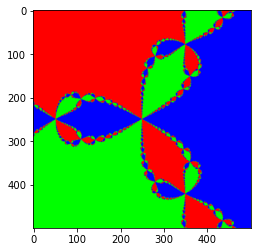

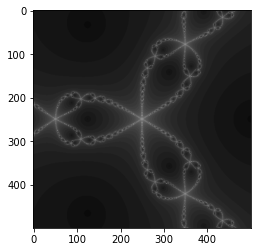

In [21]:
# initialiser la discretisation de [-1,1] * [-1,1]
N = 500
px = np.linspace(-1,1,N)
py = np.linspace(1,-1,N) 

# bassins d'attraction des racines
image = np.zeros((N, N, 3)) # on réinitialise à une image noire
image2 = np.ones((N, N, 3)) # on crée une image blanche

for ix in range(N):
    for iy in range(N):
        z0 = complex(px[ix], py[iy])
        sol, It, b = newtonMod(f, fprime, z0, epsilon, maxIt)
        # on colorie en fonction du nombre d'itérations image2        
        image2[iy, ix, :] = It/maxIt*np.ones(3)
        if b== 0:
            image[iy, ix, 0] = 1 # en rouge
        elif b == 1:
            image[iy, ix, 1] = 1 # en vert
        elif b == 2:
            image[iy, ix, 2] = 1 # en bleu
        # et si b == -1 on laisse en noir
        
plt.imshow(image)

plt.figure(6)
plt.imshow(image2)

5. Prenez le temps d'admirer !

## Prolongations.- 

*Pour ceux qui ont le temps*, vous pouvez choisir une (ou même plusieurs) des suggestions suivantes pour approfondir l'étude.

- Choisir un polynôme (différent de celui figurant sur votre feuille de TP) et représenter les bassins d'attractions de la méthode de Newton associée ;
- Faire varier progressivement un coefficient/paramètre définissant votre polynôme et représenter les bassins d'attractions pour différentes valeurs du paramètre ;
- "Ralentir" la méthode de Newton en la remplaçant par 
$$
F(z) = z - h \frac{P(z)}{P^\prime(z)}
$$
pour $h$ de plus en plus petit ;
- Représenter les bassins d'attractions associés à une autre méthode itérative ;
- etc.